In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Employers_data.csv')

df.columns = ['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Job_Title',
       'Years_of_Experience', 'Education_Level', 'Location', 'Salary']

df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Years_of_Experience,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000


In [3]:
df.shape

(10000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Employee_ID          10000 non-null  int64 
 1   Name                 10000 non-null  object
 2   Age                  10000 non-null  int64 
 3   Gender               10000 non-null  object
 4   Department           10000 non-null  object
 5   Job_Title            10000 non-null  object
 6   Years_of_Experience  10000 non-null  int64 
 7   Education_Level      10000 non-null  object
 8   Location             10000 non-null  object
 9   Salary               10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
df.columns

Index(['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Job_Title',
       'Years_of_Experience', 'Education_Level', 'Location', 'Salary'],
      dtype='object')

In [6]:
df.describe()

,Employee_ID,Age,Years_of_Experience,Salary
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,35.455900,12.370900,115381.500000
std,2886.89568,10.000213,9.148951,46066.139047
min,1.00000,21.000000,0.000000,25000.000000
25%,2500.75000,27.000000,5.000000,70000.000000
50%,5000.50000,34.000000,10.000000,120000.000000
75%,7500.25000,43.000000,19.000000,150000.000000
max,10000.00000,60.000000,37.000000,215000.000000


# Data Cleaning

In [7]:
# Checking for null data

df.isnull().sum()

Employee_ID            0
Name                   0
Age                    0
Gender                 0
Department             0
Job_Title              0
Years_of_Experience    0
Education_Level        0
Location               0
Salary                 0
dtype: int64

In [8]:
df = df.drop(['Employee_ID', 'Name'], axis=1)
df.head()

,Age,Gender,Department,Job_Title,Years_of_Experience,Education_Level,Location,Salary
0,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,56,Male,Sales,Executive,33,Master,Seattle,195000
2,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,25,Female,HR,Analyst,2,Master,Seattle,70000


In [9]:
df.duplicated().sum() # checking for duplicate values

np.int64(3157)

In [10]:
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Removed {before - after} duplicate rows.")
df.reset_index(drop=True, inplace=True)

Removed 3157 duplicate rows.


In [11]:
df.shape

(6843, 8)

In [12]:
# Checking Unique Value count of Gender

df['Gender'].value_counts()

Gender
Male      3520
Female    3323
Name: count, dtype: int64

In [13]:
# Checking Unique Value count of Gender

df['Department'].value_counts()

Department
Product        1261
Finance        1201
HR             1197
Engineering    1144
Sales          1062
Marketing       978
Name: count, dtype: int64

In [14]:
# Checking Unique Value count of Gender

df['Job_Title'].value_counts()

Job_Title
Manager      2446
Executive    1559
Analyst      1489
Engineer     1071
Intern        278
Name: count, dtype: int64

In [15]:
# Checking Unique Value count of Education Level

df['Education_Level'].value_counts()

Education_Level
Master      3577
Bachelor    1794
PhD         1472
Name: count, dtype: int64

In [16]:

df['Education_Level'] = df['Education_Level'].replace({
    "Bachelor": "Bachelor's Degree",
    "Master": "Master's Degree",
    "PhD": "PhD"
})

df['Education_Level'].value_counts()

Education_Level
Master's Degree      3577
Bachelor's Degree    1794
PhD                  1472
Name: count, dtype: int64

In [17]:
# Checking Unique Value count of Location

df['Location'].value_counts()

Location
Austin           1398
Seattle          1390
San Francisco    1357
Chicago          1354
New York         1344
Name: count, dtype: int64

# Exploratory Data Analysis

In [18]:
from ydata_profiling import ProfileReport
ProfileReport(df,title="EDA",explorative=False)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00, 358.67it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

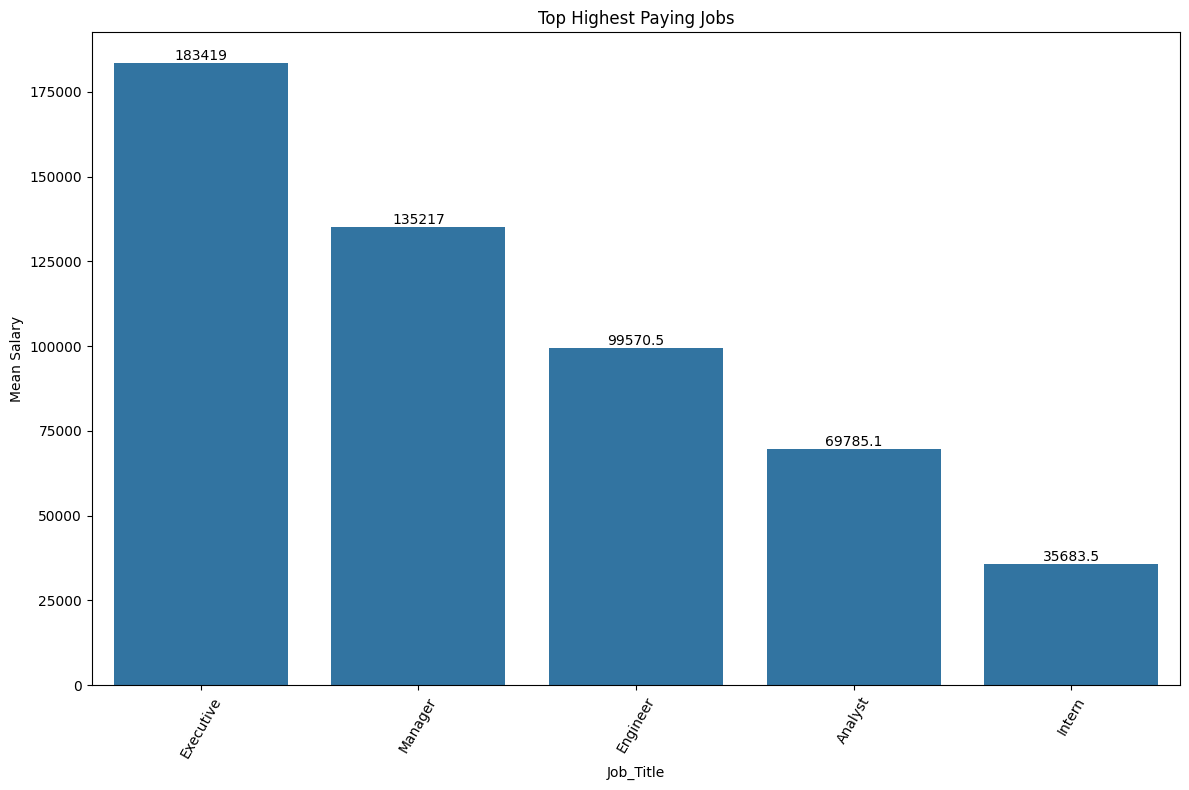

In [19]:
# Get the top job titles with the highest mean salary
top_highest_paying_jobs = df.groupby('Job_Title')['Salary'].mean().nlargest(10)

# Create a single bar plot for the top highest paying job titles and their mean salaries

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_highest_paying_jobs.index, y=top_highest_paying_jobs.values)

# Add value labels to each bar
ax.bar_label(ax.containers[0])

# Customize the plot
plt.xlabel('Job_Title')
plt.ylabel('Mean Salary')
plt.title('Top Highest Paying Jobs')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

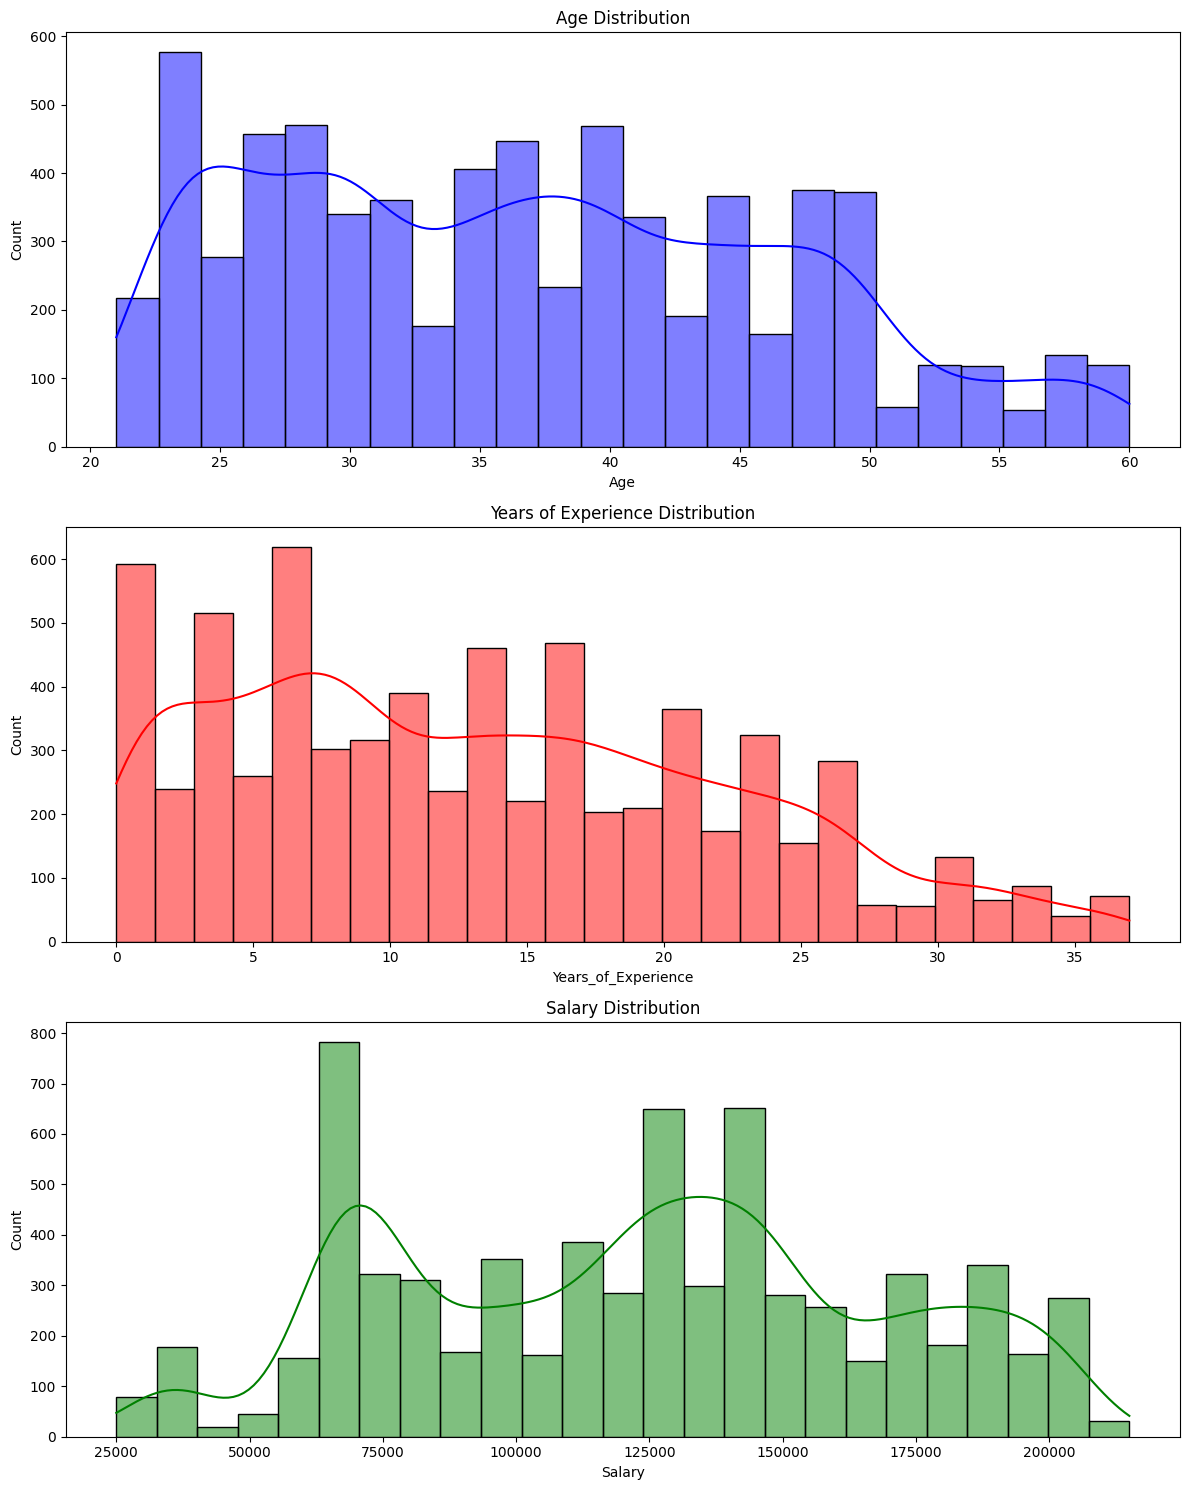

In [20]:
# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Create a histogram of Age in the first subplot
sns.histplot(df['Age'], ax=ax[0], color='blue', kde=True)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# Create a histogram of Years of Experience in the second subplot
sns.histplot(df['Years_of_Experience'], ax=ax[1], color='red', kde=True)
ax[1].set_title('Years of Experience Distribution')
ax[1].set_xlabel('Years_of_Experience')

# Create a histogram of Salary in the third subplot
sns.histplot(df['Salary'], ax=ax[2], color='green', kde=True)
ax[2].set_title('Salary Distribution')
ax[2].set_xlabel('Salary')

plt.tight_layout()
plt.show()

In [21]:
df.head()

,Age,Gender,Department,Job_Title,Years_of_Experience,Education_Level,Location,Salary
0,24,Female,Engineering,Engineer,1,Master's Degree,Austin,90000
1,56,Male,Sales,Executive,33,Master's Degree,Seattle,195000
2,21,Male,Engineering,Intern,1,Bachelor's Degree,New York,35000
3,30,Male,Finance,Analyst,9,Bachelor's Degree,New York,75000
4,25,Female,HR,Analyst,2,Master's Degree,Seattle,70000


# Detecting Outliers

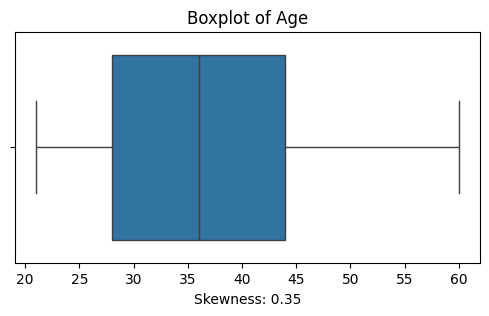

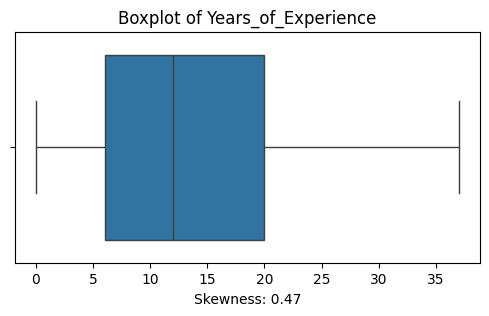

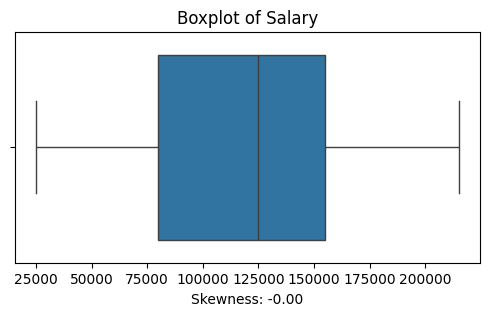

In [22]:
# Visualizing Age and Years_of_experience distributions with boxplots

import matplotlib.pyplot as plt
import seaborn as sns

for col in ['Age', 'Years_of_Experience','Salary']:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    skewness = df[col].skew()
    plt.xlabel(f'Skewness: {skewness:.2f}')
    plt.show()


# Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

# Fit the encoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender'].unique()

# Fit the encoder
le = LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])
df['Department'].unique()

# Fit the encoder
le = LabelEncoder()
df['Job_Title'] = le.fit_transform(df['Job_Title'])
df['Job_Title'].unique()

# Fit the encoder
le = LabelEncoder()
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Education_Level'].unique()

# Fit the encoder
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['Location'].unique()

array([0, 4, 2, 3, 1])

In [24]:
df['Salary'].value_counts()

Salary
70000     436
65000     346
140000    331
130000    329
75000     322
145000    320
125000    320
135000    298
120000    284
150000    280
115000    208
80000     200
180000    181
95000     177
110000    177
100000    176
190000    173
90000     168
185000    167
175000    165
195000    164
200000    163
105000    161
170000    157
60000     157
155000    157
165000    150
85000     111
205000    111
160000    101
35000      96
40000      81
30000      69
55000      40
210000     29
45000      20
25000      10
50000       5
215000      3
Name: count, dtype: int64

In [25]:
# Binarizing Salary column

df['Salary'] = df['Salary'].apply(lambda x: 0 if x < 120000 else 1)
df['Salary'].unique()

array([0, 1])

# Correlation between attributes

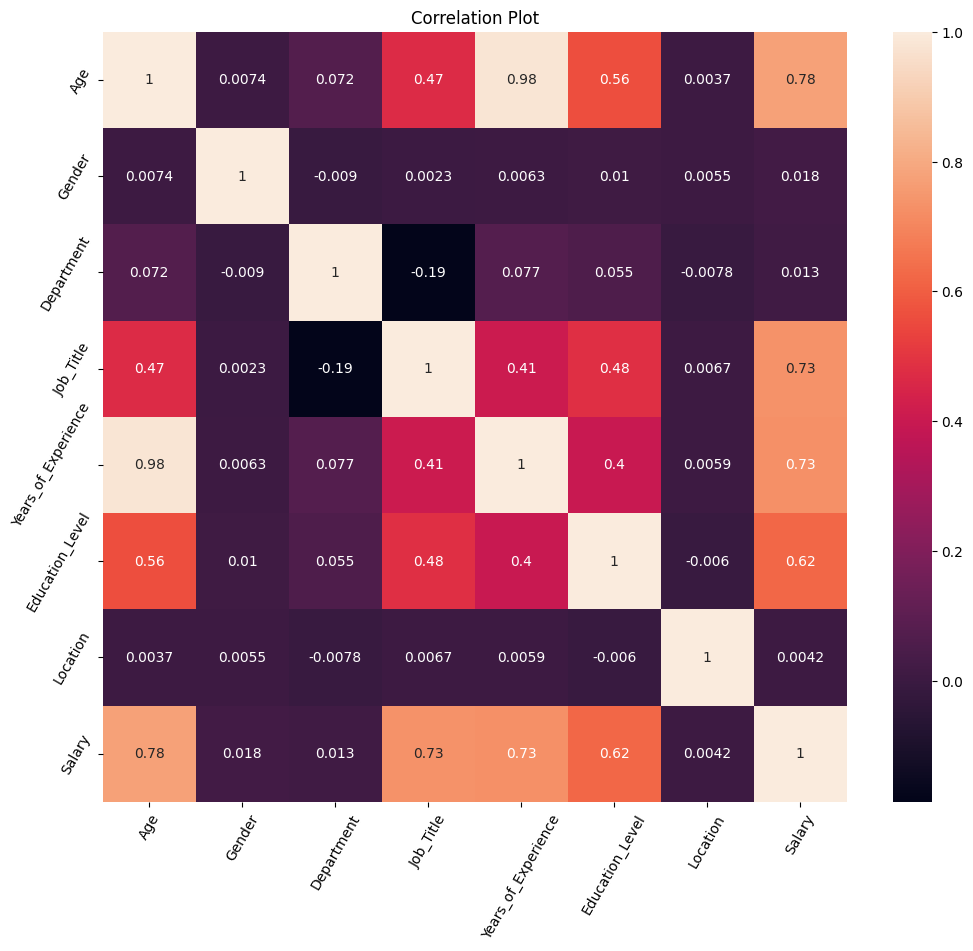

In [26]:
# Correlation plot
plt.figure(figsize=(12, 10))  # Set the figure size
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Plot')
plt.xticks(rotation=60) 
plt.yticks(rotation=60) 
plt.show()

# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

X = df[['Age', 'Gender', 'Department', 'Job_Title', 'Years_of_Experience', 'Education_Level', 'Location']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and Predicting

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

rand_clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of RF: {accuracy*100} %")

logreg = LogisticRegression(max_iter=2000, random_state=42)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of LR: {accuracy*100} %")

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)       

y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN: {accuracy*100} %")

nn_model = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=2000, random_state=42)
nn_model.fit(X_train, y_train)

y_pred = nn_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of NN: {accuracy*100} %")

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) 
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of XGBoost: {accuracy*100} %")

Accuracy of RF: 95.76333089846604 %
Accuracy of LR: 95.836376917458 %
Accuracy of KNN: 96.20160701241782 %
Accuracy of NN: 96.78597516435354 %
Accuracy of XGBoost: 95.32505478451424 %


In [29]:
# Considering Random Forest model for final predictions
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [30]:
print("Train data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_test.shape))

Train data shape: (5474, 7)
Test data shape: (1369, 7)


In [31]:
result = {
    'Actual': y_test,
    'Predicted': y_pred
}

pd.DataFrame(result)

,Actual,Predicted
132,1,1
2706,1,1
5171,1,1
1433,0,0
4248,1,1
...,...,...
3929,1,0
240,1,1
783,1,1
1354,0,0


# Model Evaluation

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy Score:',acc,'\nPrecision:', pr,'\nRecall Score:', re,'\nF1 Score:', f1,'\nConfusion Matrix: \n', cm)
print(classification_report(y_test,y_pred))

Accuracy Score: 0.9576333089846604 
Precision: 0.968503937007874 
Recall Score: 0.9559585492227979 
F1 Score: 0.9621903520208605 
Confusion Matrix: 
 [[573  24]
 [ 34 738]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       597
           1       0.97      0.96      0.96       772

    accuracy                           0.96      1369
   macro avg       0.96      0.96      0.96      1369
weighted avg       0.96      0.96      0.96      1369



In [33]:
# Saving the Random Forest model using pickle
import pickle
rand_clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rand_clf.fit(X_train, y_train)

with open("rf_model.pkl", "wb") as f:
    pickle.dump(rand_clf, f)

print("RF model saved as rf_model.pkl")

RF model saved as rf_model.pkl
